In [1]:
##importance of the feature scaling in ann

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [20]:
df=pd.read_csv("/content/Social_Network_Ads.csv")

In [21]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [22]:
df=df.iloc[:,2:5]


In [23]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


<Axes: xlabel='Age', ylabel='EstimatedSalary'>

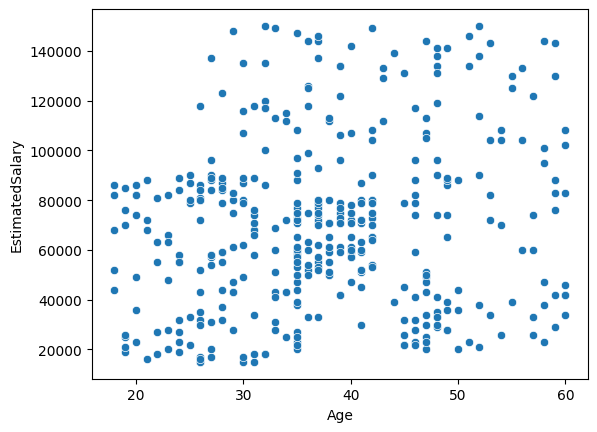

In [27]:
sns.scatterplot(x=df.iloc[:,0],y=df.iloc[:,1])

In [28]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [30]:
model = Sequential()

model.add(Dense(128,activation='relu',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 513 (2.00 KB)

 Trainable params: 513 (2.00 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [33]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [36]:
history=model.fit(x_train,y_train,epochs=100,batch_size=32,validation_data=(x_test,y_test))

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.4874 - loss: 191.1512 - val_accuracy: 0.6500 - val_loss: 136.8935
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5818 - loss: 156.7140 - val_accuracy: 0.3500 - val_loss: 78.5117
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5616 - loss: 84.1070 - val_accuracy: 0.3500 - val_loss: 156.5255
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4682 - loss: 98.2258 - val_accuracy: 0.4375 - val_loss: 2.5592
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5457 - loss: 41.2908 - val_accuracy: 0.3500 - val_loss: 20.3875
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4330 - loss: 33.3127 - val_accuracy: 0.6500 - val_loss: 114.1786
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6073 - loss: 104.8720 - val_accuracy: 0.6500 - val_loss: 42.7962
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5908 - loss: 76.4668

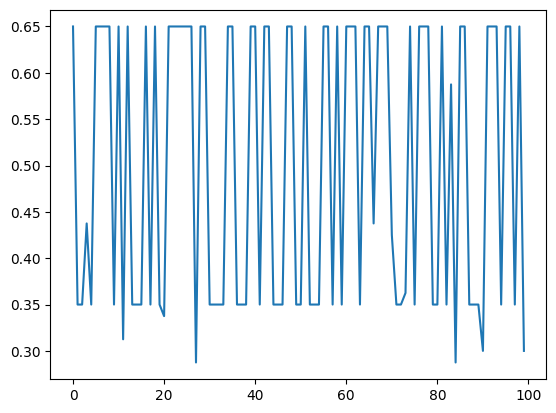

In [37]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_accuracy'])

In [38]:
##here you can easily see that the val_accuracy is oscillating due to the scale of i/p columns the neural network takes much time or can't train

In [39]:
scaler=StandardScaler()

In [40]:
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [42]:
model1=Sequential()

model1.add(Dense(128,input_dim=2,activation='relu'))
model1.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [43]:
model1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [52]:
history = model.fit(x_train_scaled,y_train,validation_data=(x_test_scaled,y_test),epochs=100)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.6261 - loss: 0.7738 - val_accuracy: 0.6500 - val_loss: 0.6115
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6645 - loss: 0.6111 - val_accuracy: 0.7500 - val_loss: 0.4448
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7609 - loss: 0.4784 - val_accuracy: 0.9000 - val_loss: 0.3105
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8009 - loss: 0.4267 - val_accuracy: 0.9250 - val_loss: 0.2439
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8648 - loss: 0.3313 - val_accuracy: 0.9250 - val_loss: 0.2203
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8535 - loss: 0.3346 - val_accuracy: 0.9250 - val_loss: 0.2102
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8707 - loss: 0.3164 - val_accuracy: 0.9125 - val_loss: 0.2126
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8543 - loss: 0.3316 - val_accuracy: 0.9125

<Axes: >

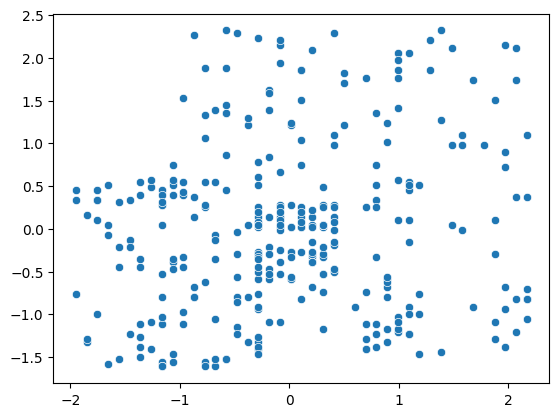

In [53]:
sns.scatterplot(x=x_train_scaled[:,0],y=x_train_scaled[:,1])

In [55]:
##after scaling it is easy to train neural network